In [ ]:
# !pip install geopandas folium matplotlib seaborn scipy
# !pip install esda
# !pip install splot
# # for google colab, had to reinstall some pacakges.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import os
import io
import geopandas as gpd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# suppress warning
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
file_path1 = '/content/drive/My Drive/X999/bbl_evictions_merged_covid.csv'
# new name, new path

In [6]:
file_path2 = '/content/drive/My Drive/X999/svi_cleaned.csv'

In [9]:
bbl_evictions_df = pd.read_csv(file_path1)

In [10]:
svi_df = pd.read_csv(file_path2)

# **Step 1: Merge the cleaned SVI dataframe with bbl_evictions_df**

In [11]:
# only select relevant one
columns_list = ['FIPS', 'E_TOTPOP', 'RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'RPL_THEMES',
               'EP_POV150', 'EP_UNEMP', 'EP_NOHSDP', 'EP_UNINSUR','EP_AGE65', 'EP_AGE17', 'EP_DISABL', 'EP_LIMENG',
               'EP_NOVEH', 'EP_CROWD', 'EP_HBURD','EP_AFAM', 'EP_HISP', 'EP_ASIAN', 'EP_AIAN', 'EP_NHPI', 'EP_TWOMORE',
                'EP_OTHERRACE', 'EP_MINRTY']

In [12]:
# the cleaned svi df has changed all columns to lower case, so we will do it here too.
lowercase_columns = [col.lower() for col in columns_list]

In [13]:
svi_simplified = svi_df[lowercase_columns]
svi_simplified.head()

,fips,e_totpop,rpl_theme1,rpl_theme2,rpl_theme3,rpl_theme4,rpl_themes,ep_pov150,ep_unemp,ep_nohsdp,ep_uninsur,ep_age65,ep_age17,ep_disabl,ep_limeng,ep_noveh,ep_crowd,ep_hburd,ep_afam,ep_hisp,ep_asian,ep_aian,ep_nhpi,ep_twomore,ep_otherrace,ep_minrty
0,10001,27004,0.5688,0.1692,0.8670,0.9806,0.7414,20.3,4.3,9.1,3.1,12.7,10.0,8.6,5.3,85.5,2.7,23.1,8.2,19.3,18.6,0.0,0.0,2.9,0.8,49.8
1,10002,76518,0.9639,0.8781,0.9369,0.9254,0.9656,36.8,7.6,30.0,5.4,23.1,13.1,13.0,24.7,82.8,6.8,40.8,8.0,26.0,37.2,0.1,0.0,2.4,0.8,74.4
2,10003,53877,0.3389,0.0969,0.7977,0.9368,0.5373,14.3,4.7,4.2,2.4,15.1,7.2,6.7,2.3,80.2,3.2,21.8,5.4,10.3,16.7,0.1,0.1,3.8,0.3,36.7
3,10004,4579,0.0252,0.0769,0.8439,0.8558,0.2299,3.7,0.4,0.9,0.3,4.1,18.3,2.3,0.9,72.9,7.6,6.1,5.5,5.0,29.9,0.0,0.0,3.5,0.0,43.9
4,10005,8801,0.0631,0.0427,0.7504,0.8496,0.2437,7.4,3.4,2.5,1.2,1.8,10.5,1.1,0.3,92.3,8.4,10.9,4.8,8.6,11.2,0.0,0.0,6.5,0.0,31.0


In [14]:
svi_df.shape, svi_simplified.shape

((204, 153), (204, 26))

In [15]:
svi_simplified['ep_white'] = 100 - svi_simplified['ep_minrty']

In [16]:
bbl_evictions_df.eviction_postcode.dtype, svi_simplified.fips.dtype

(dtype('int64'), dtype('int64'))

In [17]:
bbl_evictions_df['eviction_postcode'] = bbl_evictions_df['eviction_postcode'].astype(str)
svi_simplified['fips'] = svi_simplified['fips'].astype(str)

In [18]:
merged_df = pd.merge(bbl_evictions_df,
                    svi_simplified,
                    left_on='eviction_postcode',
                    right_on='fips',
                    how='left')

# **Step 2: check nans of the merged_df**
## **Step 2.1 first glance**
After merging bbl_evictions_df and svi_simplified, we check nan, since rpl_themes is the most import column and any rows that have nan

In [19]:
merged_df.rename(columns={'eviction_postcode': 'zipcode'}, inplace=True)

In [20]:
merged_df.shape

(6564, 67)

In [21]:
merged_df.isna().sum()
# so some zipcodes simply did not exist in svi dataset

,0
primary_key,0
court_index_number,0
docket_number,0
eviction_address,0
eviction_apartment_number,0
executed_date,0
borough,0
zipcode,0
ejectment,0
eviction/legal_possession,0


In [22]:
nan_rows = merged_df[merged_df['rpl_themes'].isna()]
nan_rows.head() # the zipcodes were not matches in this case and all the svi columns are nan

,primary_key,court_index_number,docket_number,eviction_address,eviction_apartment_number,executed_date,borough,zipcode,ejectment,eviction/legal_possession,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta,year,month_year,geometry,average_year_eviction_count,yearbuilt,bldgclass,numfloors,unitsres,ownername,bldgarea,building_type,building_category,is_condo,floor_category,rent_era,architectural_style,economic_period,residential_units_category,is_llc,building_size_category,size_quartile,decade,fips,e_totpop,rpl_theme1,rpl_theme2,rpl_theme3,rpl_theme4,rpl_themes,ep_pov150,ep_unemp,ep_nohsdp,ep_uninsur,ep_age65,ep_age17,ep_disabl,ep_limeng,ep_noveh,ep_crowd,ep_hburd,ep_afam,ep_hisp,ep_asian,ep_aian,ep_nhpi,ep_twomore,ep_otherrace,ep_minrty,ep_white
60,054173/18_101269,054173/18,101269,910 DINSMORE AVENUE,2E,2022-11-28,QUEENS,11691,Not an Ejectment,Possession,40.604926,-73.746319,14.0,31.0,103202.0,4297806,4155160119,Far Rockaway-Bayswater,2022,2022-11,POINT (-73.746319 40.604926),0.2,1927.0,C1,4.0,37.0,910 ASSOCIATES LLC,43120.0,pre-war,walk-up,False,mid-rise,"Pre-1947, pre-rent-control","1921–1930, Art Deco Skyscrapers","Pre-1929, pre-great depression",21-100 units,True,very large,Q4 (largest 25%),1920-1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,056964/19_105604,056964/19,105604,1925 SEAGIRT BLVD.,3-L,2021-08-24,QUEENS,11691,Not an Ejectment,Possession,40.595128,-73.753454,14.0,31.0,99802.0,4301620,4158100025,Far Rockaway-Bayswater,2021,2021-08,POINT (-73.753454 40.595128),0.2,1966.0,D3,17.0,256.0,ISRAEL SENIOR CIT HSG,144202.0,post-war,elevator,False,high-rise,"1947–1969, rent-control","1951–1980, the International Style, Alternativ...","1946–1975, pst war economic boom",100+ units,False,mega,Q4 (largest 25%),1960-1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,059886/19_100437,059886/19,100437,353 BEACH 70TH ST,1B,2020-01-31,QUEENS,11692,Not an Ejectment,Possession,40.591794,-73.798999,14.0,31.0,954.0,4303312,4160830005,Hammels-Arverne-Edgemere,2020,2020-01,POINT (-73.798999 40.591794),0.4,1930.0,C3,2.0,4.0,HARVEY TAYLOR,2600.0,pre-war,walk-up,False,low-rise,"Pre-1947, pre-rent-control","1921–1930, Art Deco Skyscrapers","1930-1945, great depression and WWII",3-5 units,False,small,Q3 (50-75%),1930-1939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,063420/19_103433,063420/19,103433,533 BEACH 66 ST.,2,2022-07-06,QUEENS,11692,Not an Ejectment,Possession,40.595776,-73.795451,14.0,31.0,964.0,4302668,4160330054,Hammels-Arverne-Edgemere,2022,2022-07,POINT (-73.795451 40.595776),0.4,1925.0,C0,2.0,3.0,MARGARET ALLISON,2564.0,pre-war,walk-up,False,low-rise,"Pre-1947, pre-rent-control","1921–1930, Art Deco Skyscrapers","Pre-1929, pre-great depression",3-5 units,False,small,Q3 (50-75%),1920-1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,063944/19_101109,063944/19,101109,167 BEACH 59 STREET,1ST FLOOR,2020-02-07,QUEENS,11692,Not an Ejectment,Possession,40.591208,-73.788844,14.0,31.0,964.0,4462935,4159020142,Hammels-Arverne-Edgemere,2020,2020-02,POINT (-73.788844 40.591208),0.4,2000.0,B1,2.0,2.0,"FLOYD, RONALD",2052.0,post-war,two-family,False,low-rise,"1994–Present, vacancy decontrol","1981–2000, Post-Modernism","1991–2008, modern economic growth",2-unit,False,small,Q3 (50-75%),2000-2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
nan_rows.zipcode.unique()

array(['11691', '11692', '11693', '11694', '11040'], dtype=object)

## **Step2.2 remove the unmatched zipcodes**

### source: https://www.zipdatamaps.com/11443

In [24]:
these_zipcodes_with_neighborhoods = [
    '11691',  # Far rockaway (Queens)
    '11692',  # Arverne, Edgemere (Queens)
    '11694',  # Rockaway Park, Belle harbor (Queens)
    '11693',  # Broad channel (Queens)
    '11001',  # Floral park, Bellerose, etc.
    '10041',  # Financial District (Manhattan)
    '11040'   # New Hyde Park, Manhasset hills,
]
# since these are very much outskirts of nyc neighborhoods, and they represent a very small portion of the
# whole dataset, we will remove these rows with nans

In [25]:
zipcodes_not_in_use = [
    '11381','10360','11442','10260','11467','11382','11202','11384','11443','11240','10424','11266','11137','11272','11698',
    '11439','11242','10101','10433','10000']

In [26]:
merged_df[merged_df['zipcode'].isin(zipcodes_not_in_use + these_zipcodes_with_neighborhoods)].groupby('borough').size()

,0
borough,
QUEENS,114


In [27]:
missing_svi = merged_df['rpl_themes'].isna().sum()
print(missing_svi/len(merged_df)*100,"% missing rows")

1.736745886654479 % missing rows


In [28]:
missing_svi, merged_df.shape

(np.int64(114), (6564, 67))

In [29]:
missing_postcodes = merged_df[merged_df['rpl_themes'].isna()]['zipcode'].unique()
missing_postcodes

array(['11691', '11692', '11693', '11694', '11040'], dtype=object)

### **We will save them to a seperate csv, but will remove them from the merged_df (these zipcodes are less likely to be used in the end)**

In [30]:
merged_df['invalid_zip'] = merged_df['zipcode'].isin([
    '11381', '10360', '11442', '10260', '11467', '11382', '11202', '11384','11443', '11240', '10424', '11266',
    '11137', '11272', '11698', '11439','11242', '10101', '10433', '10000'
])

In [31]:
invalid_zip_df = merged_df[merged_df['invalid_zip']]
invalid_zip_df.to_csv('/content/drive/My Drive/X999/invalid_zip_backup.csv', index=False)

In [32]:
merged_df= merged_df[~merged_df['invalid_zip']].copy()

In [33]:
missing_postcodes = merged_df[merged_df['rpl_themes'].isna()]['zipcode'].unique()

In [34]:
merged_df_clean = merged_df[~merged_df['zipcode'].isin(missing_postcodes)]
merged_df.shape, merged_df_clean.shape, len(merged_df) - len(merged_df_clean)

((6564, 68), (6450, 68), 114)

In [35]:
merged_df_clean.isna().sum() # now, all the nans are from the building feature columns

,0
primary_key,0
court_index_number,0
docket_number,0
eviction_address,0
eviction_apartment_number,0
executed_date,0
borough,0
zipcode,0
ejectment,0
eviction/legal_possession,0


In [36]:
# merged_df_clean.columns

# **Step 3 Correlation tests on the main SVI metrics and average_year_eviction_count**

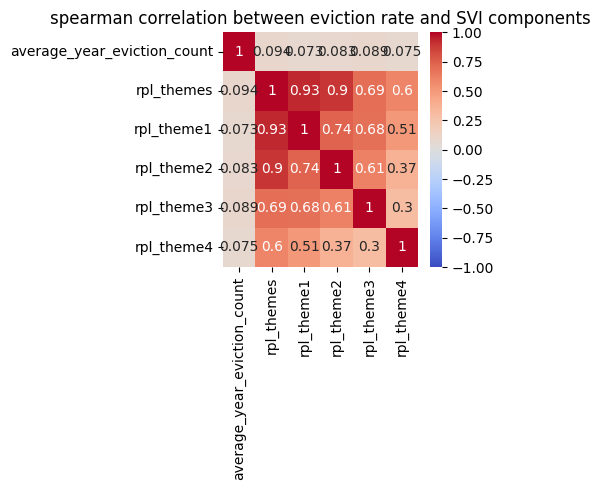

In [37]:
key_vars = ['average_year_eviction_count', 'rpl_themes', 'rpl_theme1', 'rpl_theme2', 'rpl_theme3', 'rpl_theme4']
correlation_heatmap = merged_df_clean[key_vars].corr(method='spearman')

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_heatmap, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('spearman correlation between eviction rate and SVI components')
plt.tight_layout()

In [50]:
variables = []
correlations = []
p_values = []
significance = []

In [51]:
key_vars = ['average_year_eviction_count', 'rpl_themes', 'rpl_theme1', 'rpl_theme2', 'rpl_theme3', 'rpl_theme4']
correlation_results = {}

In [52]:
for var in key_vars[1:]:
    correlation, p_value = stats.spearmanr(merged_df_clean['average_year_eviction_count'], merged_df_clean[var])
    correlation_results[var] = {'correlation': correlation, 'p_value': p_value}

In [53]:
for var, results in correlation_results.items():
    variables.append(var)
    correlations.append(results['correlation'])
    p_values.append(results['p_value'])
    significance.append("significant" if results['p_value'] < 0.05 else "not significant")

In [54]:
correlation_df = pd.DataFrame({'variables': variables, 'correlations': correlations, 'p_value': p_values,
                               'significance': significance})

In [55]:
correlation_df['correlations'] = correlation_df['correlations'].map('{:.3f}'.format)
correlation_df['p_value'] = correlation_df['p_value'].map('{:.4f}'.format)
correlation_df

,variables,correlations,p_value,significance
0,rpl_themes,0.094,0.0000,significant
1,rpl_theme1,0.073,0.0000,significant
2,rpl_theme2,0.083,0.0000,significant
3,rpl_theme3,0.089,0.0000,significant
4,rpl_theme4,0.075,0.0000,significant


The relatively weak/moderate correlations between eviction rates and SVI components suggest that evictions in NYC are not simply driven by social vulnerability as measured by the SVI. Other factors not captured in the SVI (such as local housing policies, landlord practices, or rental market conditions) likely play important roles.

The household composition/disability theme having the strongest correlation (but still weak) might indicate that household structure and disability status may be slightly more relevant to eviction risk than other vulnerability factors.

In [56]:
merged_df_clean.columns

Index(['primary_key', 'court_index_number', 'docket_number',
       'eviction_address', 'eviction_apartment_number', 'executed_date',
       'borough', 'zipcode', 'ejectment', 'eviction/legal_possession',
       'latitude', 'longitude', 'community_board', 'council_district',
       'census_tract', 'bin', 'bbl', 'nta', 'year', 'month_year', 'geometry',
       'average_year_eviction_count', 'yearbuilt', 'bldgclass', 'numfloors',
       'unitsres', 'ownername', 'bldgarea', 'building_type',
       'building_category', 'is_condo', 'floor_category', 'rent_era',
       'architectural_style', 'economic_period', 'residential_units_category',
       'is_llc', 'building_size_category', 'size_quartile', 'decade', 'fips',
       'e_totpop', 'rpl_theme1', 'rpl_theme2', 'rpl_theme3', 'rpl_theme4',
       'rpl_themes', 'ep_pov150', 'ep_unemp', 'ep_nohsdp', 'ep_uninsur',
       'ep_age65', 'ep_age17', 'ep_disabl', 'ep_limeng', 'ep_noveh',
       'ep_crowd', 'ep_hburd', 'ep_afam', 'ep_hisp', 'ep_asian',

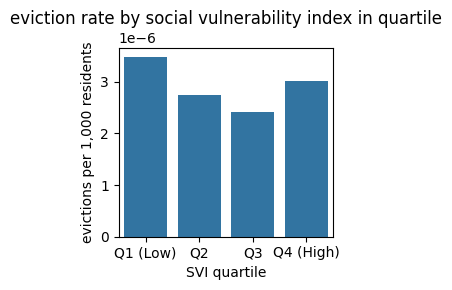

In [57]:
merged_df_clean['svi_quartile'] = pd.qcut(merged_df_clean['rpl_themes'], 4, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])
quartile_analysis = merged_df_clean.groupby('svi_quartile').agg({
    'average_year_eviction_count': 'mean',
    'e_totpop': 'sum'
}).reset_index()
quartile_analysis['total_eviction_rate'] = quartile_analysis['average_year_eviction_count'] / quartile_analysis['e_totpop'] * 1000
plt.figure(figsize=(3, 3))
sns.barplot(x='svi_quartile', y='total_eviction_rate', data=quartile_analysis)
plt.title('eviction rate by social vulnerability index in quartile')
plt.ylabel('evictions per 1,000 residents')
plt.xlabel('SVI quartile')
plt.tight_layout()

Though with weak/moderate correlation, we do see more people with higher svi score experienced more evictions than others.

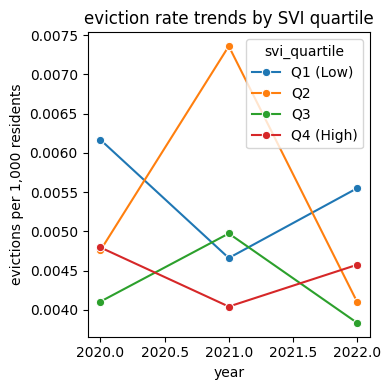

In [58]:
time_analysis = merged_df_clean.groupby(['year', 'svi_quartile']).agg({
    'average_year_eviction_count': 'sum',
    'e_totpop': 'sum'
}).reset_index()
time_analysis['yearly_eviction_rate'] = time_analysis['average_year_eviction_count'] / time_analysis['e_totpop'] * 1000

plt.figure(figsize=(4, 4))
sns.lineplot(x='year', y='yearly_eviction_rate', hue='svi_quartile', data=time_analysis, marker='o')
plt.title('eviction rate trends by SVI quartile')
plt.ylabel('evictions per 1,000 residents')
plt.xlabel('year')
plt.tight_layout()

**During covid, svi is simply not does not have strong correlation with the evictions, likely due to the fact that people who had fairly stable socialeconomic power chose to leave nyc before an lease ended.**